Matrix Completion

We intend to complete the Matrix with unkown entries using Matrix decomposotion where we learn decomposed matrices using Gradient Decent and Nested Linear Regression

Matrix Factorization

For a matrix $A_{n,m}$ learn $W_{n,r}$ and $H_{r,m}$ such that,

$ A = WH$

Method 1 Gradient Decent

In [10]:
import numpy as  np
import matplotlib.pyplot as plt

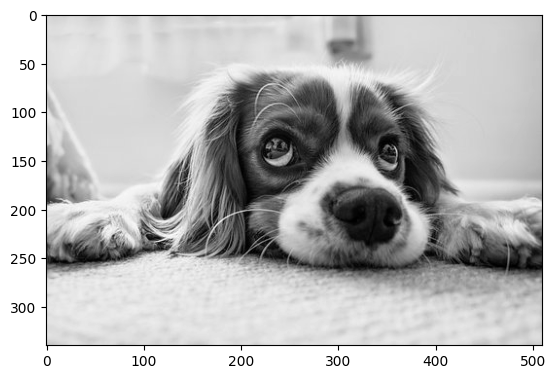

In [11]:
# Creating A
from matplotlib.image import imread

X = imread("Datasets/puppy.jpg")
A = np.mean(X,-1)
img = plt.imshow(A)
plt.set_cmap('gray')
plt.show()

In [78]:
def loss_gradient_wrt_W(W,H,i,j):
    return -2*(A[i] - W[i]@H)@H[j]

def loss_gradient_wrt_H(W,H,i,j):
    return -2*(A[:,i] - W@H[:,j])@W[:,i]

In [110]:
# Training

# intializing W and H
r = 100
n = A.shape[0]
m = A.shape[1]
W = np.random.rand(n,r)
H = np.random.rand(r,m)

max_iterations = 100
alpha = 0.00001

for i in range(max_iterations):
    for j1 in range(W.shape[0]):
        for j2 in range(W.shape[1]):
            W[j1][j2] = W[j1][j2] - alpha*loss_gradient_wrt_W(W, H, j1, j2)
    for j1 in range(H.shape[0]):
        for j2 in range(H.shape[1]):
            H[j1][j2] = H[j1][j2] - alpha*loss_gradient_wrt_H(W, H, j1, j2)

In [111]:
constructed_A = W@H

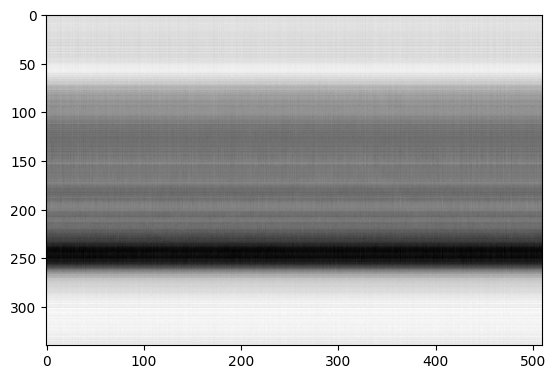

In [112]:
img = plt.imshow(constructed_A)
plt.set_cmap('gray')
plt.show()